Using this dataset we should build a model to predict whether the movie awarded oscar or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/sairam/Downloads/datasets/Movie_classification.csv")


In [3]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [5]:
df['Time_taken'].fillna(df.Time_taken.mean(),inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [7]:
pd.get_dummies(columns=['3D_available','Genre'],data=df)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_NO,3D_available_YES,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,23,494,48000,1,0,1,0,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,42,462,43200,0,1,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,38,458,69400,1,1,0,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,45,472,66800,1,0,1,0,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,55,395,72400,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,...,27,561,44800,0,1,0,1,0,0,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,...,20,600,41200,0,0,1,1,0,0,0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,...,31,576,47800,0,1,0,0,1,0,0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,...,47,607,44000,0,0,1,0,1,0,0


In [8]:
df=pd.get_dummies(df,columns=['3D_available','Genre'],drop_first=True)

In [9]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


In [10]:
x=df.loc[:,df.columns!='Start_Tech_Oscar']
x.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [11]:
y=df['Start_Tech_Oscar']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Start_Tech_Oscar, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [14]:
from sklearn import tree

In [15]:
clf_tree=tree.DecisionTreeClassifier(max_depth=3)

In [16]:
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [17]:
y_train_pred=clf_tree.predict(x_train)
y_test_pred=clf_tree.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [19]:
accuracy_score(y_test,y_test_pred)

0.49019607843137253

In [20]:
accuracy_score(y_train,y_train_pred)

0.6014851485148515

In [21]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [22]:
import graphviz

In [23]:
dot_file=tree.export_graphviz(clf_tree,feature_names=x_train.columns)

In [24]:
from IPython.display import Image

In [25]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pydotplus

In [27]:
graph=pydotplus.graph_from_dot_data(dot_file)

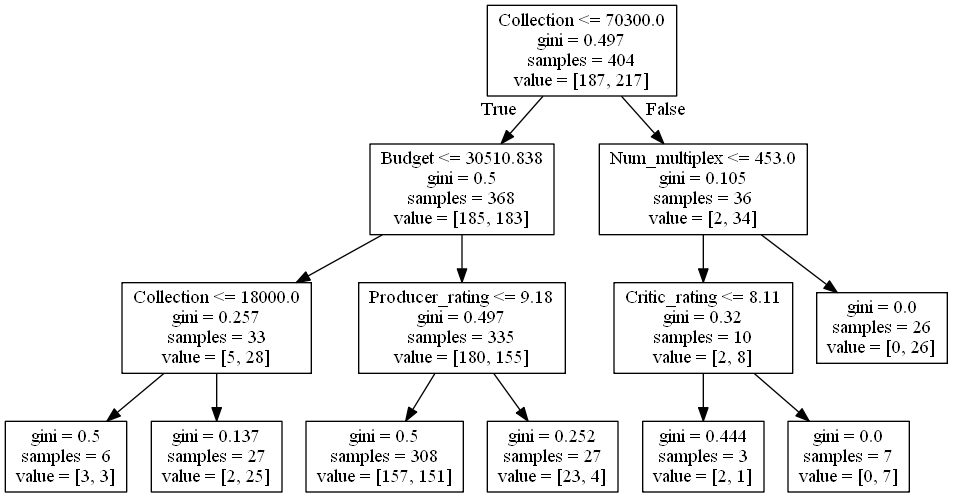

In [28]:
Image(graph.create_png())

In [29]:
clf_tree_1=tree.DecisionTreeClassifier(max_depth=4)

In [30]:
clf_tree_1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [31]:
y_train_pred_1=clf_tree_1.predict(x_train)
y_test_pred_1=clf_tree_1.predict(x_test)

In [32]:
accuracy_score(y_train,y_train_pred_1)

0.6608910891089109

In [33]:
accuracy_score(y_test,y_test_pred_1)

0.5098039215686274

In [34]:
dot_file_1=tree.export_graphviz(clf_tree_1,feature_names=x_train.columns)

In [35]:
graph_1=pydotplus.graph_from_dot_data(dot_file_1)

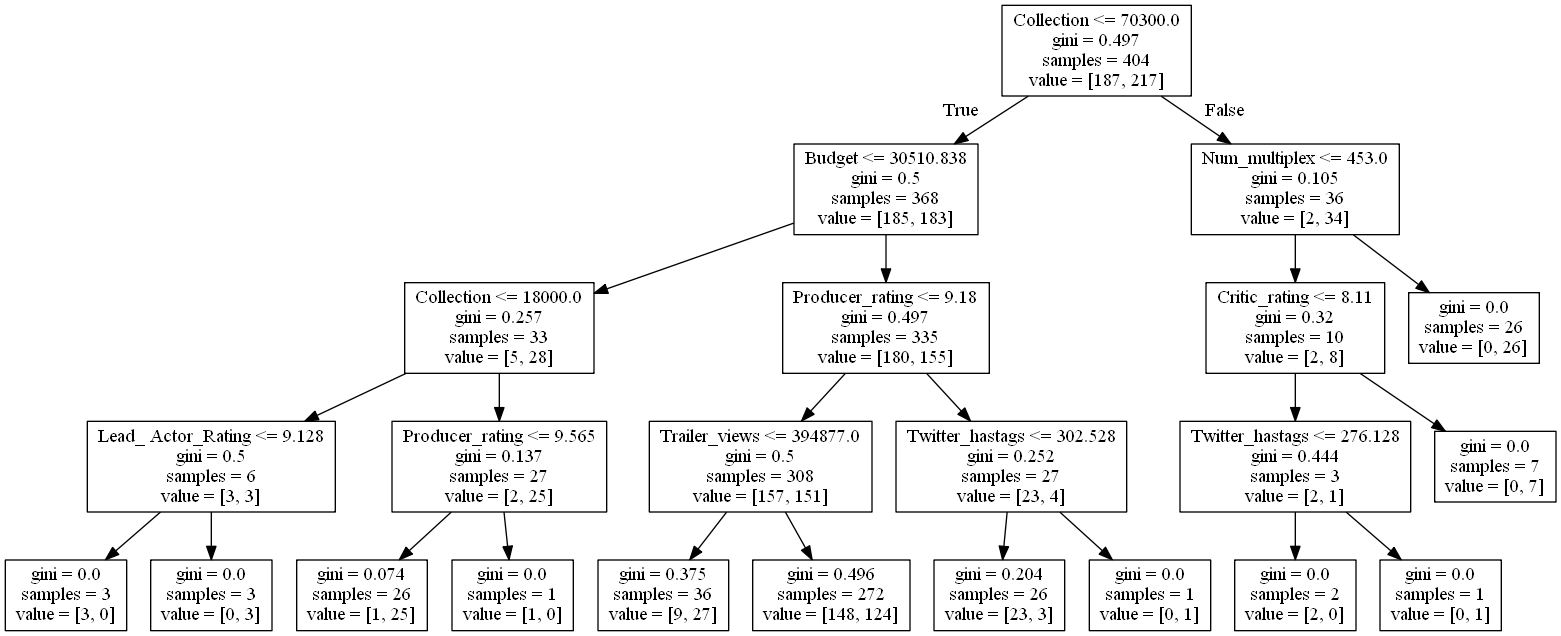

In [36]:
Image(graph_1.create_png())

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf_clf=RandomForestClassifier(n_estimators=10)

In [39]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [40]:
accuracy_score(y_train,rf_clf.predict(x_train))

0.9900990099009901

In [41]:
accuracy_score(y_test,rf_clf.predict(x_test))

0.5490196078431373

In [42]:
#grid search cross validation(cv)

from sklearn.model_selection import GridSearchCV

In [43]:
rf_clf1=RandomForestClassifier(n_estimators=100)

In [44]:
param_grid={"n_estimators":[200,250,300],"min_samples_split":[2,4,10,14],'max_features':[4,5,6,7,9]}

In [45]:
grid_search=GridSearchCV(rf_clf1,param_grid,cv=5,scoring="accuracy")

In [46]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [4, 5, 6, 7, 9],
                         'min_samples_split': [2, 4, 10, 14],
                         'n_estimators': [200, 250, 300]},
             scoring='accuracy')

In [47]:
grid_search.best_params_

{'max_features': 6, 'min_samples_split': 10, 'n_estimators': 250}

In [48]:
grid_search.best_estimator_

RandomForestClassifier(max_features=6, min_samples_split=10, n_estimators=250)

In [49]:
final_model=grid_search.best_estimator_

In [50]:
accuracy_score(y_train,final_model.predict(x_train))

0.995049504950495

In [51]:
accuracy_score(y_test,final_model.predict(x_test))

0.5980392156862745